2508687it [00:02, 1129486.52it/s]
555667it [00:00, 1224867.55it/s]
100%|██████████| 135971/135971 [00:00<00:00, 323658.84it/s]


7.003036 246297 18.44912 131523


100%|██████████| 135972/135972 [00:00<00:00, 473963.46it/s]


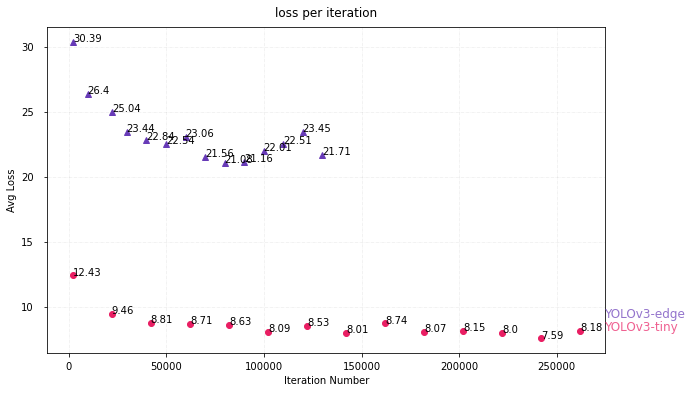

<Figure size 720x432 with 0 Axes>

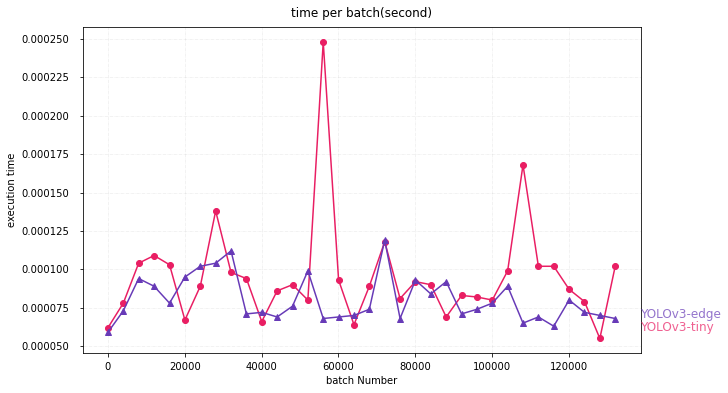

In [3]:
import sys
import matplotlib.pyplot as plt
from tqdm import tqdm
import math

tiny_lines = []
edge_lines = []
tiny_time = []
edge_time = []

for line in tqdm(open('tiny_train.log')):
    if "avg" in line:
        tiny_lines.append(line)
    elif "Loaded" in line:
        tiny_time.append(line)

for line in tqdm(open('edge_train.log')):
    if "avg" in line:
        edge_lines.append(line)
    elif "Loaded" in line:
        edge_time.append(line)
        

def extract_log_avg(tiny_lines, edge_lines):
    tiny_iterations = []
    tiny_avg_loss = []
    edge_iterations = []
    edge_avg_loss = []

    tiny_line_cnt=len(tiny_lines)
    edge_line_cnt = len(edge_lines)

    if edge_line_cnt < tiny_line_cnt:
        tiny_line_cnt = edge_line_cnt
        tiny_lines = tiny_lines[:edge_line_cnt]
        
    else:
        edge_line_cnt = tiny_line_cnt
        edge_lines = edge_lines[:tiny_line_cnt]
        
        
    for i in tqdm(range(tiny_line_cnt)):
        tiny_lineParts = tiny_lines[i].split(',')
        edge_lineParts = edge_lines[i].split(',')
        tiny_iterations.append(int(tiny_lineParts[0].split(':')[0]))
        tiny_avg_loss.append(float(tiny_lineParts[1].split()[0]))
        edge_iterations.append(int(edge_lineParts[0].split(':')[0]))
        edge_avg_loss.append(float(edge_lineParts[1].split()[0]))
        
    return tiny_iterations, tiny_avg_loss, edge_iterations, edge_avg_loss

def extract_log_time(tiny_time, edge_time):
    size = None
    if len(tiny_time) > len(edge_time):
        size = len(edge_time)
        tiny_time = tiny_time[:size]
    else:
        size = len(tiny_time)
        edge_time = edge_time[:size]
        
    tiny_x = []
    edge_x = []
    tiny_y = []
    edge_y = []
    
    for i in tqdm(range(size)):
        tiny_lineParts = tiny_time[i].split(' ')
        edge_lineParts = edge_time[i].split(' ')
        if float(tiny_lineParts[1]) >= 0.0005 or float(edge_lineParts[1]) >= 0.0005:
            continue
        tiny_y.append(float(tiny_lineParts[1]))
        edge_y.append(float(edge_lineParts[1]))
        tiny_x.append(i)
        edge_x.append(i)
    return tiny_x, tiny_y, edge_x, edge_y
    
    
def draw_avg_graph():
    
    tiny_x, tiny_y, edge_x, edge_y = extract_log_avg(tiny_lines, edge_lines)
    tiny_min = min(tiny_y)
    t_batch = tiny_x[tiny_y.index(tiny_min)]
    edge_min = min(edge_y)
    e_batch = edge_x[edge_y.index(edge_min)]
    print(tiny_min, t_batch, edge_min, e_batch)
    fig, ax = plt.subplots(1,1 , figsize = (10,6)) #start = 0
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)
    ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)
    plt.figure(figsize = (10,6))
    start = 1000
    term = 10000
    for i in range(start, len(tiny_x), term):
        ax.plot(tiny_x[i:i+1], tiny_y[i:i+1], color="#e91e63", marker = 'o', linestyle = '-')
        ax.plot(edge_x[i:i+1], edge_y[i:i+1], color="#673ab7", marker = '^', linestyle = '-')
        #print(iterations[i], avg_loss[i])m
        ax.text(tiny_x[i], tiny_y[i], str(round(tiny_y[i], 2)))
        ax.text(edge_x[i], edge_y[i], str(round(edge_y[i], 2)))

    ax.set_xlabel('Iteration Number')
    ax.set_ylabel('Avg Loss')
    ax.set_title('loss per iteration', pad = 10)
    
    fig.text(0.9, 0.2, "YOLOv3-tiny", fontsize = 12, color = '#e91e63', ha = 'left', va='top', alpha = 0.7)
    fig.text(0.9, 0.2, "YOLOv3-edge", fontsize = 12, color = '#673ab7', ha = 'left', va='bottom', alpha = 0.7)
    
def draw_time_graph():
    tiny_x, tiny_y, edge_x, edge_y = extract_log_time(tiny_time, edge_time)
    fig1, ax1 = plt.subplots(1,1 , figsize = (10,6)) #start = 0
    ax1.xaxis.set_tick_params(pad = 5)
    ax1.yaxis.set_tick_params(pad = 10)
    ax1.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)
    tiny_x = tiny_x[::4000]
    tiny_y = tiny_y[::4000]
    edge_x = edge_x[::4000]
    edge_y = edge_y[::4000]
    ax1.set_xlabel('batch Number')
    ax1.set_ylabel('execution time')
    ax1.set_title('time per batch(second)', pad=10)
    ax1.plot(tiny_x, tiny_y, color="#e91e63", marker = 'o', linestyle = '-')
    ax1.plot(edge_x, edge_y, color="#673ab7", marker = '^', linestyle = '-')

    fig1.text(0.9, 0.2, "YOLOv3-tiny", fontsize = 12, color = '#e91e63', ha = 'left', va='top', alpha = 0.7)
    fig1.text(0.9, 0.2, "YOLOv3-edge", fontsize = 12, color = '#673ab7', ha = 'left', va='bottom', alpha = 0.7)


if __name__ == '__main__':
    draw_avg_graph()
    draw_time_graph()